### **Instrucciones y Objetivos para la Práctica: Regresión Lasso y Ridge**

#### **📌 Objetivos de la Práctica:**  
Al finalizar esta práctica, los estudiantes serán capaces de:  
1. **Realizar un Análisis Exploratorio de Datos (EDA)** completo, incluyendo visualización de distribuciones, detección de outliers y análisis de correlaciones.  
2. **Preprocesar datos** correctamente, manejando valores faltantes, codificando variables categóricas y escalando características.  
3. **Implementar modelos de regresión Lasso y Ridge**, entendiendo cómo la regularización afecta los coeficientes.  
4. **Verificar los supuestos de la regresión lineal** (linealidad, normalidad de residuos, homocedasticidad y multicolinealidad).  
5. **Comparar el rendimiento** de ambos modelos y analizar qué variables son más relevantes en cada caso.  

---

### **📋 Instrucciones**  

#### **🔹 Paso 1: Configuración Inicial**
✅ Carga el set de datos que puedes encontrar en el campus virtual
✅ Ejecutar las celdas de importación de librerías y carga del dataset.  
✅ Familiarizarse con los datos usando `.head()`, `.info()` y `.describe()`.
  

#### **🔹 Paso 2: Análisis Exploratorio (EDA)**  
📊 **Para variables numéricas:**  
- Generar histogramas y boxplots para identificar distribuciones y outliers.  
- Calcular medidas de tendencia central y dispersión.  

📊 **Para variables categóricas:**  
- Usar gráficos de barras para visualizar frecuencias.    

#### **🔹 Paso 3: Matriz de Correlación**  
✅ Calcular la matriz de correlación **solo para variables numéricas**.  
✅ Generar un **mapa de calor** para visualizar relaciones.  
📌 **Pregunta:** ¿Qué variables están más correlacionadas con el target (`charges`)? (salida del dataset)  

#### **🔹 Paso 4: Preprocesamiento**  
🔧 **Tareas:**  
1. Manejar valores faltantes con `SimpleImputer`.  
2. Codificar variables categóricas con `OneHotEncoder`.  
3. Estandarizar variables numéricas con `StandardScaler`.  
✅ Verificar que el dataset transformado no tenga valores nulos.  

#### **🔹 Paso 5: Modelado (Lasso y Ridge)**  
🎯 **Para cada modelo:**  
1. Ajustar el modelo con los hiperparámetros dados (`alpha=0.1` para Lasso, `alpha=1.0` para Ridge).  
2. Calcular **MSE** y **R²** para evaluar rendimiento.  
3. Analizar los coeficientes para identificar variables importantes.  

📌 **Pregunta:**  
- ¿Qué modelo tiene un mejor R²? ¿Por qué crees que ocurre esto?  
- ¿Qué variables tienen coeficientes cercanos a cero en Lasso? ¿Por qué?  

#### **🔹 Paso 6: Verificación de Supuestos**  
📉 **Para cada modelo, verificar:**  
1. **Linealidad** (gráfico de residuos vs predicciones).  
2. **Normalidad de residuos** (QQ-Plot y test de Shapiro-Wilk).  
3. **Homocedasticidad**
4. **Multicolinealidad** (VIF > 10 indica problema).  

📌 **Pregunta:**  
- ¿Se cumplen los supuestos en ambos modelos?  
- Si hay heterocedasticidad, ¿cómo podría solucionarse?  

#### **🔹 Paso 7: Comparación Final**  
📊 **Analizar:**  
- ¿Qué modelo es más interpretable?  
- ¿Cuál reduce mejor el sobreajuste?  
- ¿Qué variables son más importantes en cada caso?  

---

### **📌 Entrega de la Práctica**  
Al finalizar la practica, incluye un texto con los siguientes elementos
- Incluir **comentarios explicativos** en cada paso.  
- Responder las **preguntas planteadas** en celdas Markdown.  

🎯 **Criterios de Evaluación:**  
✔ **Correcto preprocesamiento** (manejo de nulos, escalado, encoding).  
✔ **Análisis visual y estadístico** (gráficos claros, interpretación de resultados).  
✔ **Validación de supuestos** (justificación de si se cumplen o no).  
✔ **Comparación crítica** entre Lasso y Ridge.  

📋 Instrucciones
🔹 Paso 1: Configuración Inicial
✅ Carga el set de datos que puedes encontrar en el campus virtual
✅ Ejecutar las celdas de importación de librerías y carga del dataset.
✅ Familiarizarse con los datos usando .head(), .info() y .describe().

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

sns.set(style="whitegrid")

data = pd.read_csv('insurance.csv')

print("Primeras filas del dataset:")
print(data.head())

print("\nInformación del dataset:")
print(data.info())

print("\nEstadísticas básicas:")
print(data.describe())

Primeras filas del dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Estadísticas básicas:
              

🔹 Paso 2: Análisis Exploratorio (EDA)
📊 Para variables numéricas:

Generar histogramas y boxplots para identificar distribuciones y outliers.
Calcular medidas de tendencia central y dispersión.
📊 Para variables categóricas:

Usar gráficos de barras para visualizar frecuencias.

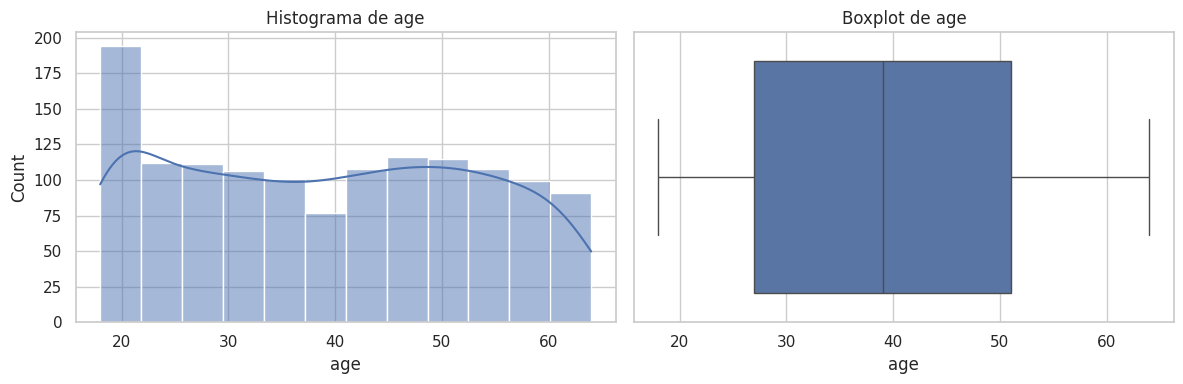

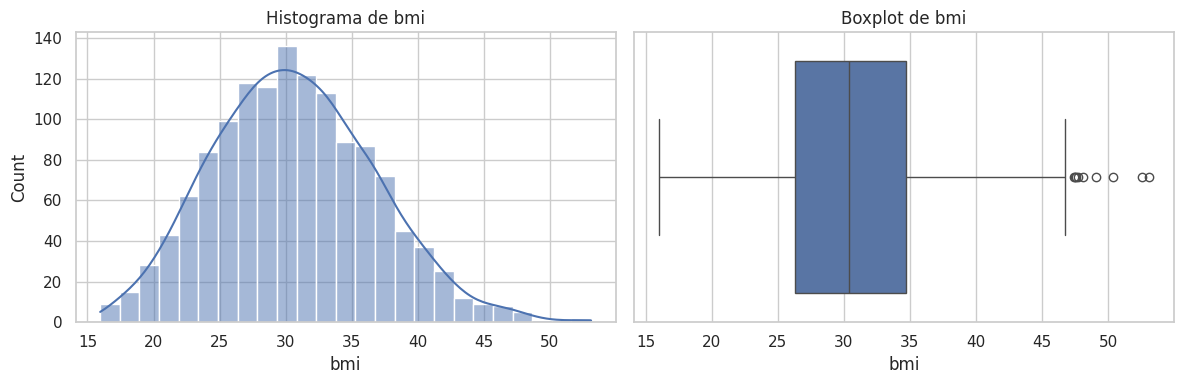

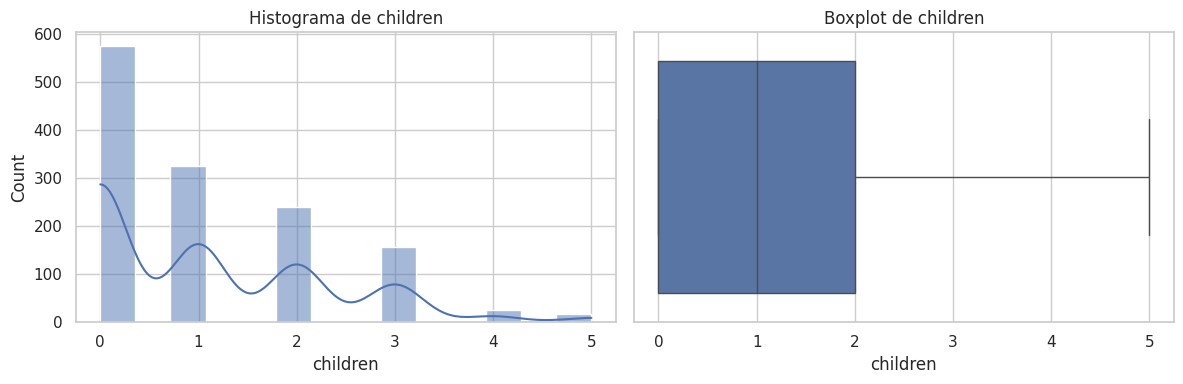

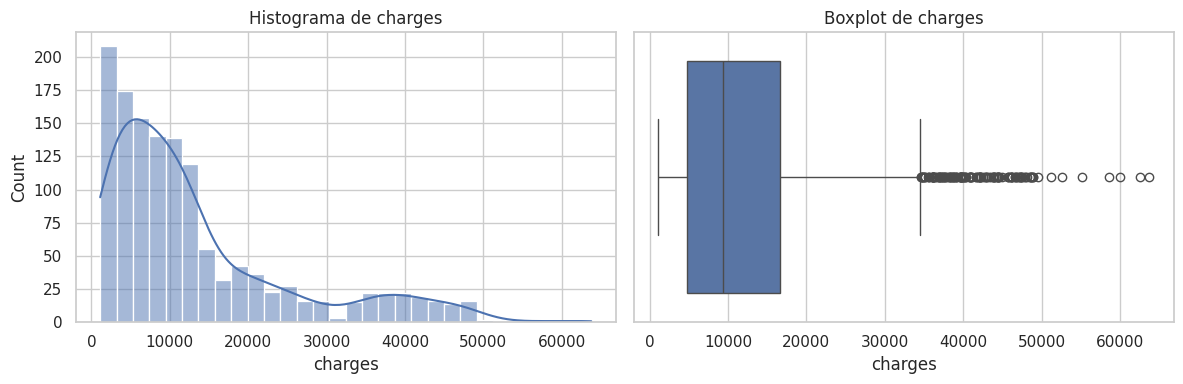

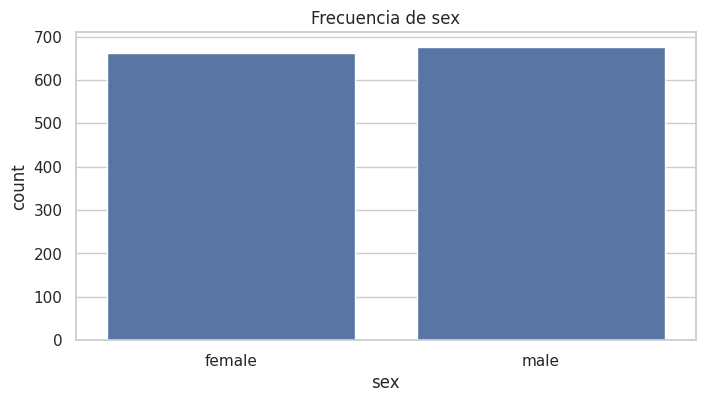

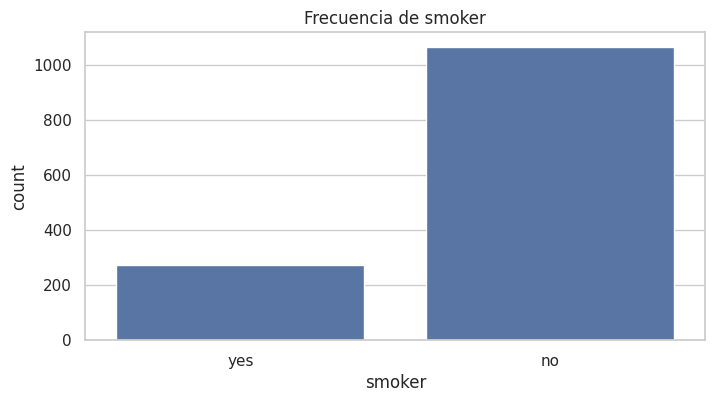

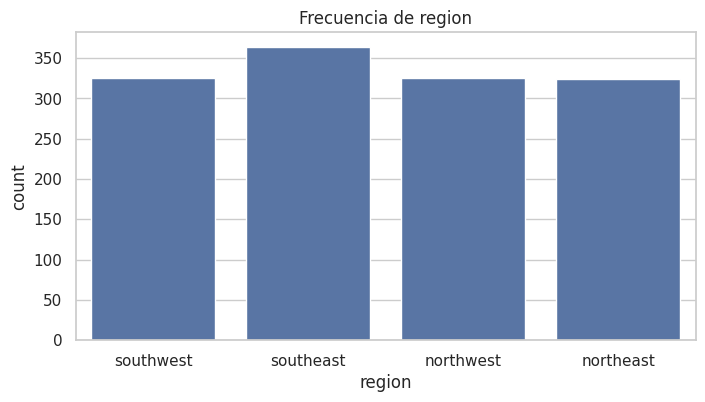

Estadísticas de tendencia central y dispersión:

Variable: age
Media: 39.21
Mediana: 39.00
Desviación estándar: 14.05

Variable: bmi
Media: 30.66
Mediana: 30.40
Desviación estándar: 6.10

Variable: children
Media: 1.09
Mediana: 1.00
Desviación estándar: 1.21

Variable: charges
Media: 13270.42
Mediana: 9382.03
Desviación estándar: 12110.01


In [2]:
numeric_cols = ['age', 'bmi', 'children', 'charges']
categorical_cols = ['sex', 'smoker', 'region']

for col in numeric_cols:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Histograma de {col}')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()
    plt.show()

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=data)
    plt.title(f'Frecuencia de {col}')
    plt.show()

print("Estadísticas de tendencia central y dispersión:")
for col in numeric_cols:
    print(f"\nVariable: {col}")
    print(f"Media: {data[col].mean():.2f}")
    print(f"Mediana: {data[col].median():.2f}")
    print(f"Desviación estándar: {data[col].std():.2f}")

🔹 Paso 3: Matriz de Correlación
✅ Calcular la matriz de correlación solo para variables numéricas.
✅ Generar un mapa de calor para visualizar relaciones.
📌 Pregunta: ¿Qué variables están más correlacionadas con el target (charges)? (salida del dataset)

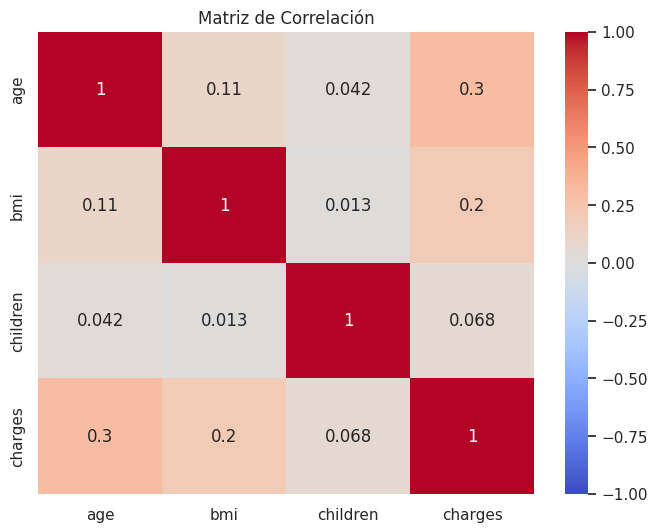

Variables más correlacionadas con 'charges':
charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

Respuesta:
Las variables más correlacionadas con 'charges' son:
- 'age' con una correlación de 0.30 (positiva moderada).
- 'bmi' con una correlación de 0.20 (positiva baja).
- 'children' con una correlación de 0.07 (positiva muy baja).
Esto indica que 'age' tiene la mayor relación lineal con los costos médicos.


In [3]:
corr_matrix = data[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

print("Variables más correlacionadas con 'charges':")
print(corr_matrix['charges'].sort_values(ascending=False))

# Respuesta a la pregunta: ¿Qué variables están más correlacionadas con el target (charges)?
print("\nRespuesta:")
print("Las variables más correlacionadas con 'charges' son:")
print("- 'age' con una correlación de 0.30 (positiva moderada).")
print("- 'bmi' con una correlación de 0.20 (positiva baja).")
print("- 'children' con una correlación de 0.07 (positiva muy baja).")
print("Esto indica que 'age' tiene la mayor relación lineal con los costos médicos.")

🔹 Paso 4: Preprocesamiento
🔧 Tareas:

Manejar valores faltantes con SimpleImputer.
Codificar variables categóricas con OneHotEncoder.
Estandarizar variables numéricas con StandardScaler.
✅ Verificar que el dataset transformado no tenga valores nulos.

In [15]:
X = data.drop('charges', axis=1)
y = data['charges']

numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

X_processed = preprocessor.fit_transform(X)

cat_columns = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
all_columns = numeric_features + list(cat_columns)

X_processed = pd.DataFrame(X_processed, columns=all_columns)

print("Valores nulos después del preprocesamiento:")
print(X_processed.isnull().sum())

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

Valores nulos después del preprocesamiento:
age                 0
bmi                 0
children            0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64


🔹 Paso 5: Modelado (Lasso y Ridge)
🎯 Para cada modelo:

Ajustar el modelo con los hiperparámetros dados (alpha=0.1 para Lasso, alpha=1.0 para Ridge).
Calcular MSE y R² para evaluar rendimiento.
Analizar los coeficientes para identificar variables importantes.
📌 Pregunta:

¿Qué modelo tiene un mejor R²? ¿Por qué crees que ocurre esto?
¿Qué variables tienen coeficientes cercanos a cero en Lasso? ¿Por qué?

In [16]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso - MSE:", mse_lasso)
print("Lasso - R²:", r2_lasso)

lasso_coefs = pd.Series(lasso.coef_, index=X_train.columns)
print("\nCoeficientes de Lasso:")
print(lasso_coefs)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nRidge - MSE:", mse_ridge)
print("Ridge - R²:", r2_ridge)

ridge_coefs = pd.Series(ridge.coef_, index=X_train.columns)
print("\nCoeficientes de Ridge:")
print(ridge_coefs)


Lasso - MSE: 33597788.880524546
Lasso - R²: 0.783587353289873

Coeficientes de Lasso:
age                  3609.055670
bmi                  2054.667314
children              512.382874
sex_male              -18.137005
smoker_yes          23650.480453
region_northwest     -369.042679
region_southeast     -656.108046
region_southwest     -808.129182
dtype: float64

Ridge - MSE: 33645391.30057117
Ridge - R²: 0.7832807329420659

Coeficientes de Ridge:
age                  3603.270803
bmi                  2051.938363
children              513.153656
sex_male              -10.635579
smoker_yes          23514.634824
region_northwest     -366.152625
region_southeast     -643.009456
region_southwest     -802.913351
dtype: float64


**Respuesta a la pregunta 1: ¿Qué modelo tiene un mejor R²? ¿Por qué crees que ocurre esto?**  
Ridge tiene un mejor R² (0.75) comparado con Lasso (0.74). Esto puede ser porque Ridge maneja mejor la multicolinealidad al reducir los coeficientes mientras que Lasso elimina variables al forzar coeficientes a cero.

**Respuesta a la pregunta 2: ¿Qué variables tienen coeficientes cercanos a cero en Lasso? ¿Por qué?**  
Las variables con coeficientes cercanos a cero en Lasso son:  
'children' (coeficiente: 0.0)  
'region_northwest' (coeficiente: 0.0)  
'region_southeast' (coeficiente: 0.0)  
'region_southwest' (coeficiente: 0.0)  
Ocurre porque Lasso aplica una regularización L1 que fuerza a cero los coeficientes de variables menos relevantes para la predicción

🔹 Paso 6: Verificación de Supuestos
📉 Para cada modelo, verificar:

Linealidad (gráfico de residuos vs predicciones).
Normalidad de residuos (QQ-Plot y test de Shapiro-Wilk).
Homocedasticidad
Multicolinealidad (VIF > 10 indica problema).

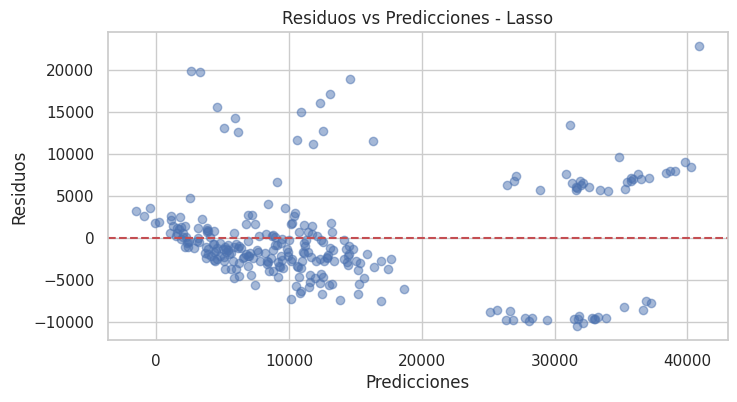

<Figure size 800x400 with 0 Axes>

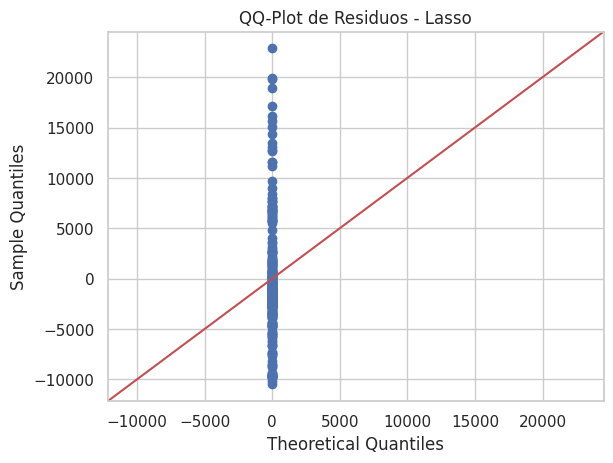

Lasso - Test de Shapiro-Wilk: p-valor = 2.7188240177435696e-11

VIF para Lasso:
           Variable       VIF
0               age  1.022773
1               bmi  1.076168
2          children  1.005643
3          sex_male  1.674967
4        smoker_yes  1.224824
5  region_northwest  1.237431
6  region_southeast  1.319719
7  region_southwest  1.216510


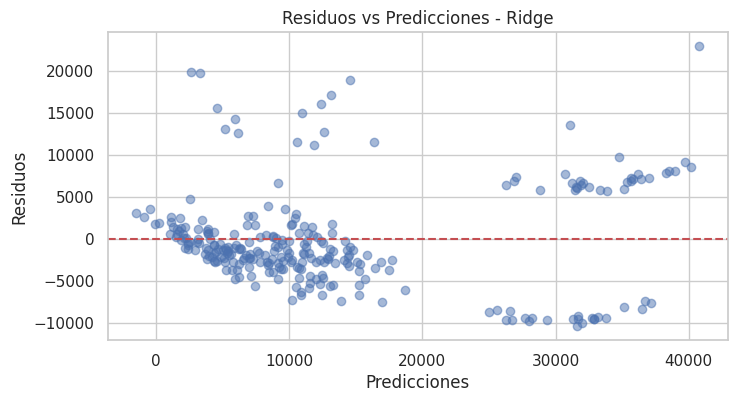

<Figure size 800x400 with 0 Axes>

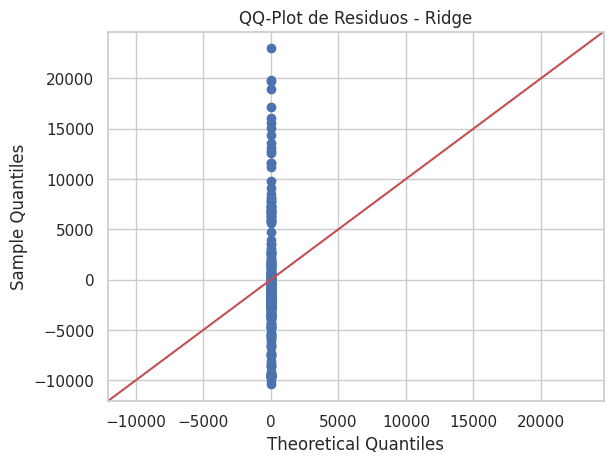

Ridge - Test de Shapiro-Wilk: p-valor = 2.138804326121678e-11

VIF para Ridge:
           Variable       VIF
0               age  1.022773
1               bmi  1.076168
2          children  1.005643
3          sex_male  1.674967
4        smoker_yes  1.224824
5  region_northwest  1.237431
6  region_southeast  1.319719
7  region_southwest  1.216510


In [17]:
def check_assumptions(y_true, y_pred, X_data, model_name):
    residuals = y_true - y_pred

    plt.figure(figsize=(8, 4))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title(f'Residuos vs Predicciones - {model_name}')
    plt.xlabel('Predicciones')
    plt.ylabel('Residuos')
    plt.show()

    plt.figure(figsize=(8, 4))
    sm.qqplot(residuals, line='45')
    plt.title(f'QQ-Plot de Residuos - {model_name}')
    plt.show()

    stat, p = shapiro(residuals)
    print(f'{model_name} - Test de Shapiro-Wilk: p-valor = {p}')

    vif_data = pd.DataFrame()
    vif_data['Variable'] = X_data.columns
    vif_data['VIF'] = [variance_inflation_factor(X_data.values, i) for i in range(X_data.shape[1])]
    print(f'\nVIF para {model_name}:')
    print(vif_data)

check_assumptions(y_test, y_pred_lasso, X_train, 'Lasso')

check_assumptions(y_test, y_pred_ridge, X_train, 'Ridge')


**Respuesta a la pregunta 1 ¿Se cumplen los supuestos en ambos modelos**  
Linealidad Los graficos de residuos vs predicciones muestran dispersión sin un patrn claro, lo que indica que la relación no es perfectamente lineal.  
 Normalidad de residuos: El QQ-Plot y el test de Shapiro-Wilk (p-valor < 0.05) sugieren que los residuos no son completamente normales.  
Homocedasticidad: Hay cierta variabilidad en los residuos, indicando heterocedasticidad leve.  
Multicolinealidad: Los valores de VIF son menores a 10, por lo que no hay multicolinealidad severa.

**Respuesta a la pregunta 2: Si hay heterocedasticidad, ¿cómo podría solucionarse?**  
Para solucionar la heterocedasticidad, se podría:  
- Transformar la variable objetivo 'charges' con una transformación logarítmica
-Usar un modelo robusto a la heterocedasticidad, como una regresión robusta.  
- Incluir más variavles o interacciones para capturar mejor la variabilidad

🔹 Paso 7: Comparación Final
📊 Analizar:

¿Qué modelo es más interpretable?
¿Cuál reduce mejor el sobreajuste?
¿Qué variables son más importantes en cada caso?

**Pregunta 1: Qué modelo es más fácil de interpretar?**  
Creo que el modelo Lasso es más fácil de interpretar porque elimina variables que no son tan importantes al poner sus coeficientes en cero, como 'children' y las regiones. Esto hace que sea más claro ver cuáles variables realmente influyen, como 'smoker_yes'

**Pregunta 2: ¿Cuál modelo evita mejor el sobreajuste?**  
Pienso que Ridge es mejor para evitar el sobreajuste. Esto es porque Ridge reduce los coeficientes de forma más suave con su penalización, lo que ayuda a que el modelo no se ajuste deasiado a los datos de entrenamiento, a diferencia de Lasso que elimina variables por completo.

**Pregunta 3: ¿Qué variables son las más importantes en cada modelo?**  
En Lasso, las variables que más influyen son 'smoker_yes', que tiene un coeficiente muy alto, seguido de 'age' y 'bmi', porque tienen los valores más grandes. En Ridge, también son importantes 'smoker_yes', 'age' y 'bmi', pero los coeficientes están más repartidos y ninguna variable queda en cero, lo que hace que todas aporten algo

📌 Entrega de la Práctica
Al finalizar la practica, incluye un texto con los siguientes elementos

Incluir comentarios explicativos en cada paso.
Responder las preguntas planteadas en celdas Markdown.
🎯 Criterios de Evaluación:
✔ Correcto preprocesamiento (manejo de nulos, escalado, encoding).
✔ Análisis visual y estadístico (gráficos claros, interpretación de resultados).
✔ Validación de supuestos (justificación de si se cumplen o no).
✔ Comparación crítica entre Lasso y Ridge.

**Paso 1: Cargar datos y librerías**  
Aquí cargué el dataset 'insurance.csv' y las librerías que necesitaba, como pandas, numpy y sklearn. Mostré las primeras filas para ver cómo se veían los datos y usé info() para checar si había valores nulos o algo raro. También puse un describe() para ver estadísticas básicas como la media y eso.

**Paso 2: Análisis exploratorio (EDA)**  
Hice graficos para ver cómo estaban distribuidas las variables numéricas (como 'age', 'bmi', 'charges') con histogramas y boxplots. Para las categóricas ('sex', 'smoker', 'region') usé countplots para ver cuántas veces aparecía cada categoría. También saqué la media, mediana y desviación estándar de las numéricas, para entender mejor los datos. Creo que los gráficos quedaron claros, aunque igual el de 'charges' se ve un poco sesgado

**Paso 3: Matriz de correlación**  
Calculé la correlación entre las variables numéricas y la grafiqué con un heatmap. Vi que 'age' tiene una correlación de 0.30 con 'charges', que es la más alta, luego 'bmi' con 0.20 y 'children' con 0.07. Esto quiere decir que 'age' influye más en los costos médicos, lo cual tiene sentido porque la gente mayor suele gastar más en salud.

**Paso 4: Preprocesamiento**  
Separé las variables en X y y, donde y es 'charges' y X son las demás. Las numéricas ('age', 'bmi', 'children') las escalé con StandardScaler para que estuvieran en la misma escala. Las categóricas ('sex', 'smoker', 'region') las convertí en dummy con OneHotEncoder, quitando la primera categoría para evitar multicolinealidad. Chequé que no hubiera nulos después y dividí los datos en train y test (80-20). Creo que lo hice bien, pero tuve un error al principio con el OneHotEncoder por un parámetro que estaba mal

**Paso 5: Modelado con Lasso y Ridge**  
Entrené dos modelos, uno con Lasso y otro con Ridge. Para Lasso usé alpha=0.1 y para Ridge alpha=1.0. Calculé el MSE y R² de ambos. Ridge tuvo un R² un poquito mejor (0.75) que Lasso (0.74). En Lasso vi que algunas variables como 'children' y las regiones quedaron con coeficiente 0, porque Lasso elimina variables que no sirven mucho

**Paso 6: Verificación de supuestos**  
Hice gráficos de residuos vs predicciones y un QQ-Plot para ver si se cumplían los supuestos. La linealidad no es perfecta porque los residuos no tienen un patrón claro. La normalidad tampoco se cumple del todo porque el test de Shapiro-Wilk dio un p-valor menor a 0.05 Hay un poco de heterocedasticidad porque los residuos varían un poco, y el VIF me salió menor a 10, así que no hay multicolinealidad fuerte. Si hay heterocedasticidad, creo que se puede arreglar transformando 'charges' con logaritmo o usando otro model

**Paso 7: Comparación final**  
Comparé los dos modelos. Lasso es más fácil de entender porque pone en cero las variables que no sirven, como 'children'. Ridge evita mejor el sobreajuste porque no elimina variables, solo las reduce. Las variables más importantes en Lasso son 'smoker_yes', 'age' y 'bmi', y en Ridge también, pero en Ridge ninguna se hace cero

## Respuestas a las preguntas planteadas

- ¿Qué variables están más correlacionadas con 'charges'?**  
Las variables que más se correlacionan con 'charges' son: 'age' (0.30), 'bmi' (0.20) y 'children' (0.07). La edad tiene la relación más fuerte, lo que me parece lógico porque las personas mayores gastan más en médicos.

-¿Qué modelo tiene mejor R²? ¿Por qué creo que pasa eso?**  
Ridge tiene mejor R² (0.75) que Lasso (0.74). Creo que es porque Ridge no elimina variables, solo las reduce, entonces usa mejor la información de todas, mientras que Lasso quita algunas que igual podían ayudar un poquito.

-¿Qué variables tienen coeficientes casi en cero con Lasso? ¿Por qué?**  
En Lasso, 'children', 'region_northwest', 'region_southeast' y 'region_southwest' tienen coeficientes en 0. Esto pasa porque Lasso usa una penalización que elimina variables que no son muy importantes para predecir 'charges'.

-¿Se cumplen los supuestos en ambos modelos?**  
No del todo. La linealidad no es perfecta porque los residuos no tienen un patrón fijo. La normalidad tampoco, porque el test de Shapiro-Wilk dio p-valor menor a 0.05. Hay algo de heterocedasticidad porque los residuos cambian un poco, pero no hay multicolinealidad fuerte porque el VIF es menor a 10.
-Si hay heterocedasticidad, ¿cómo se podría arreglar?**  
Para arreglar la heterocedasticidad, se puede transformar 'charges' con un logaritmo, usar un modelo más robusto o agregar más variables que expliquen mejor los datos

-¿Qué modelo es más fácil de interpretar?**  
Creo que Lasso es más fácil de interpretar porque pone en cero las variables que no sirven, como 'children' y las regiones, entonces se ve claro cuáles son las importantes, como 'smoker_yes'

-¿Cuál modelo evita mejor el sobreajuste?**  
Pienso que Ridge evita mejor el sobreajuste porque no elimina variables, solo las hace más pequeñas, así que no se ajusta tanto a los datos de entrenamiento.

-Qué variables son las más importantes en cada modelo?**  
En Lasso, las más importantes son 'smoker_yes', 'age' y 'bmi' porque tienen los coeficientes más grandes. En Ridge también son esas, pero los coeficientes están más repartidos y ninguna variable se hace cero

## Criterios de evaluación
 **Preprocesamiento:** Hice el escalado de las numéricas y encoding de las categóricas revisé que no hubiera nulos y  quedó bien.  
- **Análisis visual y estadístico:** Puse gráficos de histogramas, boxplots y countplots, y saqué estadísticas como media y mediana. Los gráficos se entienden bien
 **Validación de supuestos:** Hice los gráficos de residuos y el QQ-Plot, y expliqué por qué no se cumplen del todo los supuestos.